In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [33]:
data=pd.read_csv("twitter_sentiment.csv")
data.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [34]:
data.shape

(75681, 4)

In [35]:
data=data[['Positive','im getting on borderlands and i will murder you all ,']].reset_index(drop=True)
data.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [36]:
data.columns=['sentiment','text']
data.sample(5)

,sentiment,text
2698,Neutral,Confirmed edward(Richthofen) Will not be retur...
23095,Irrelevant,"Breaking a chair, jumping up and down, and tou..."
17459,Negative,Fuck a Xbox and PS5...I’m getting a SouljaStation
30122,Negative,@PlayApex releasing crossplay in a half way th...
73374,Neutral,Nvidia's GeForce Now loses all Activision Bliz...


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75681 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [38]:
data['sentiment'].value_counts()

sentiment
Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

In [39]:
data.duplicated().sum()
data.drop_duplicates(keep='first',inplace=True)

In [16]:
data.shape

(70253, 2)

<Axes: xlabel='sentiment'>

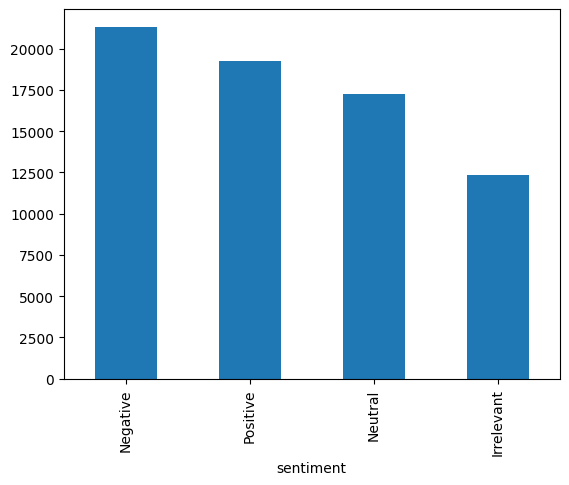

In [18]:
data['sentiment'].value_counts().plot(kind='bar')

In [22]:
data.isna().sum()

sentiment    0
text         4
dtype: int64

In [29]:
data.dropna(subset=['text'], inplace=True)

In [31]:
data.isna().sum(),data.shape

(sentiment    0
 text         0
 dtype: int64,
 (70249, 2))

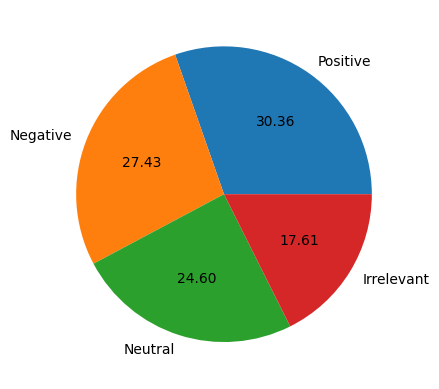

In [43]:
plt.pie(data['sentiment'].value_counts(),labels=['Positive','Negative','Neutral','Irrelevant'],autopct='%0.2f')
plt.show()

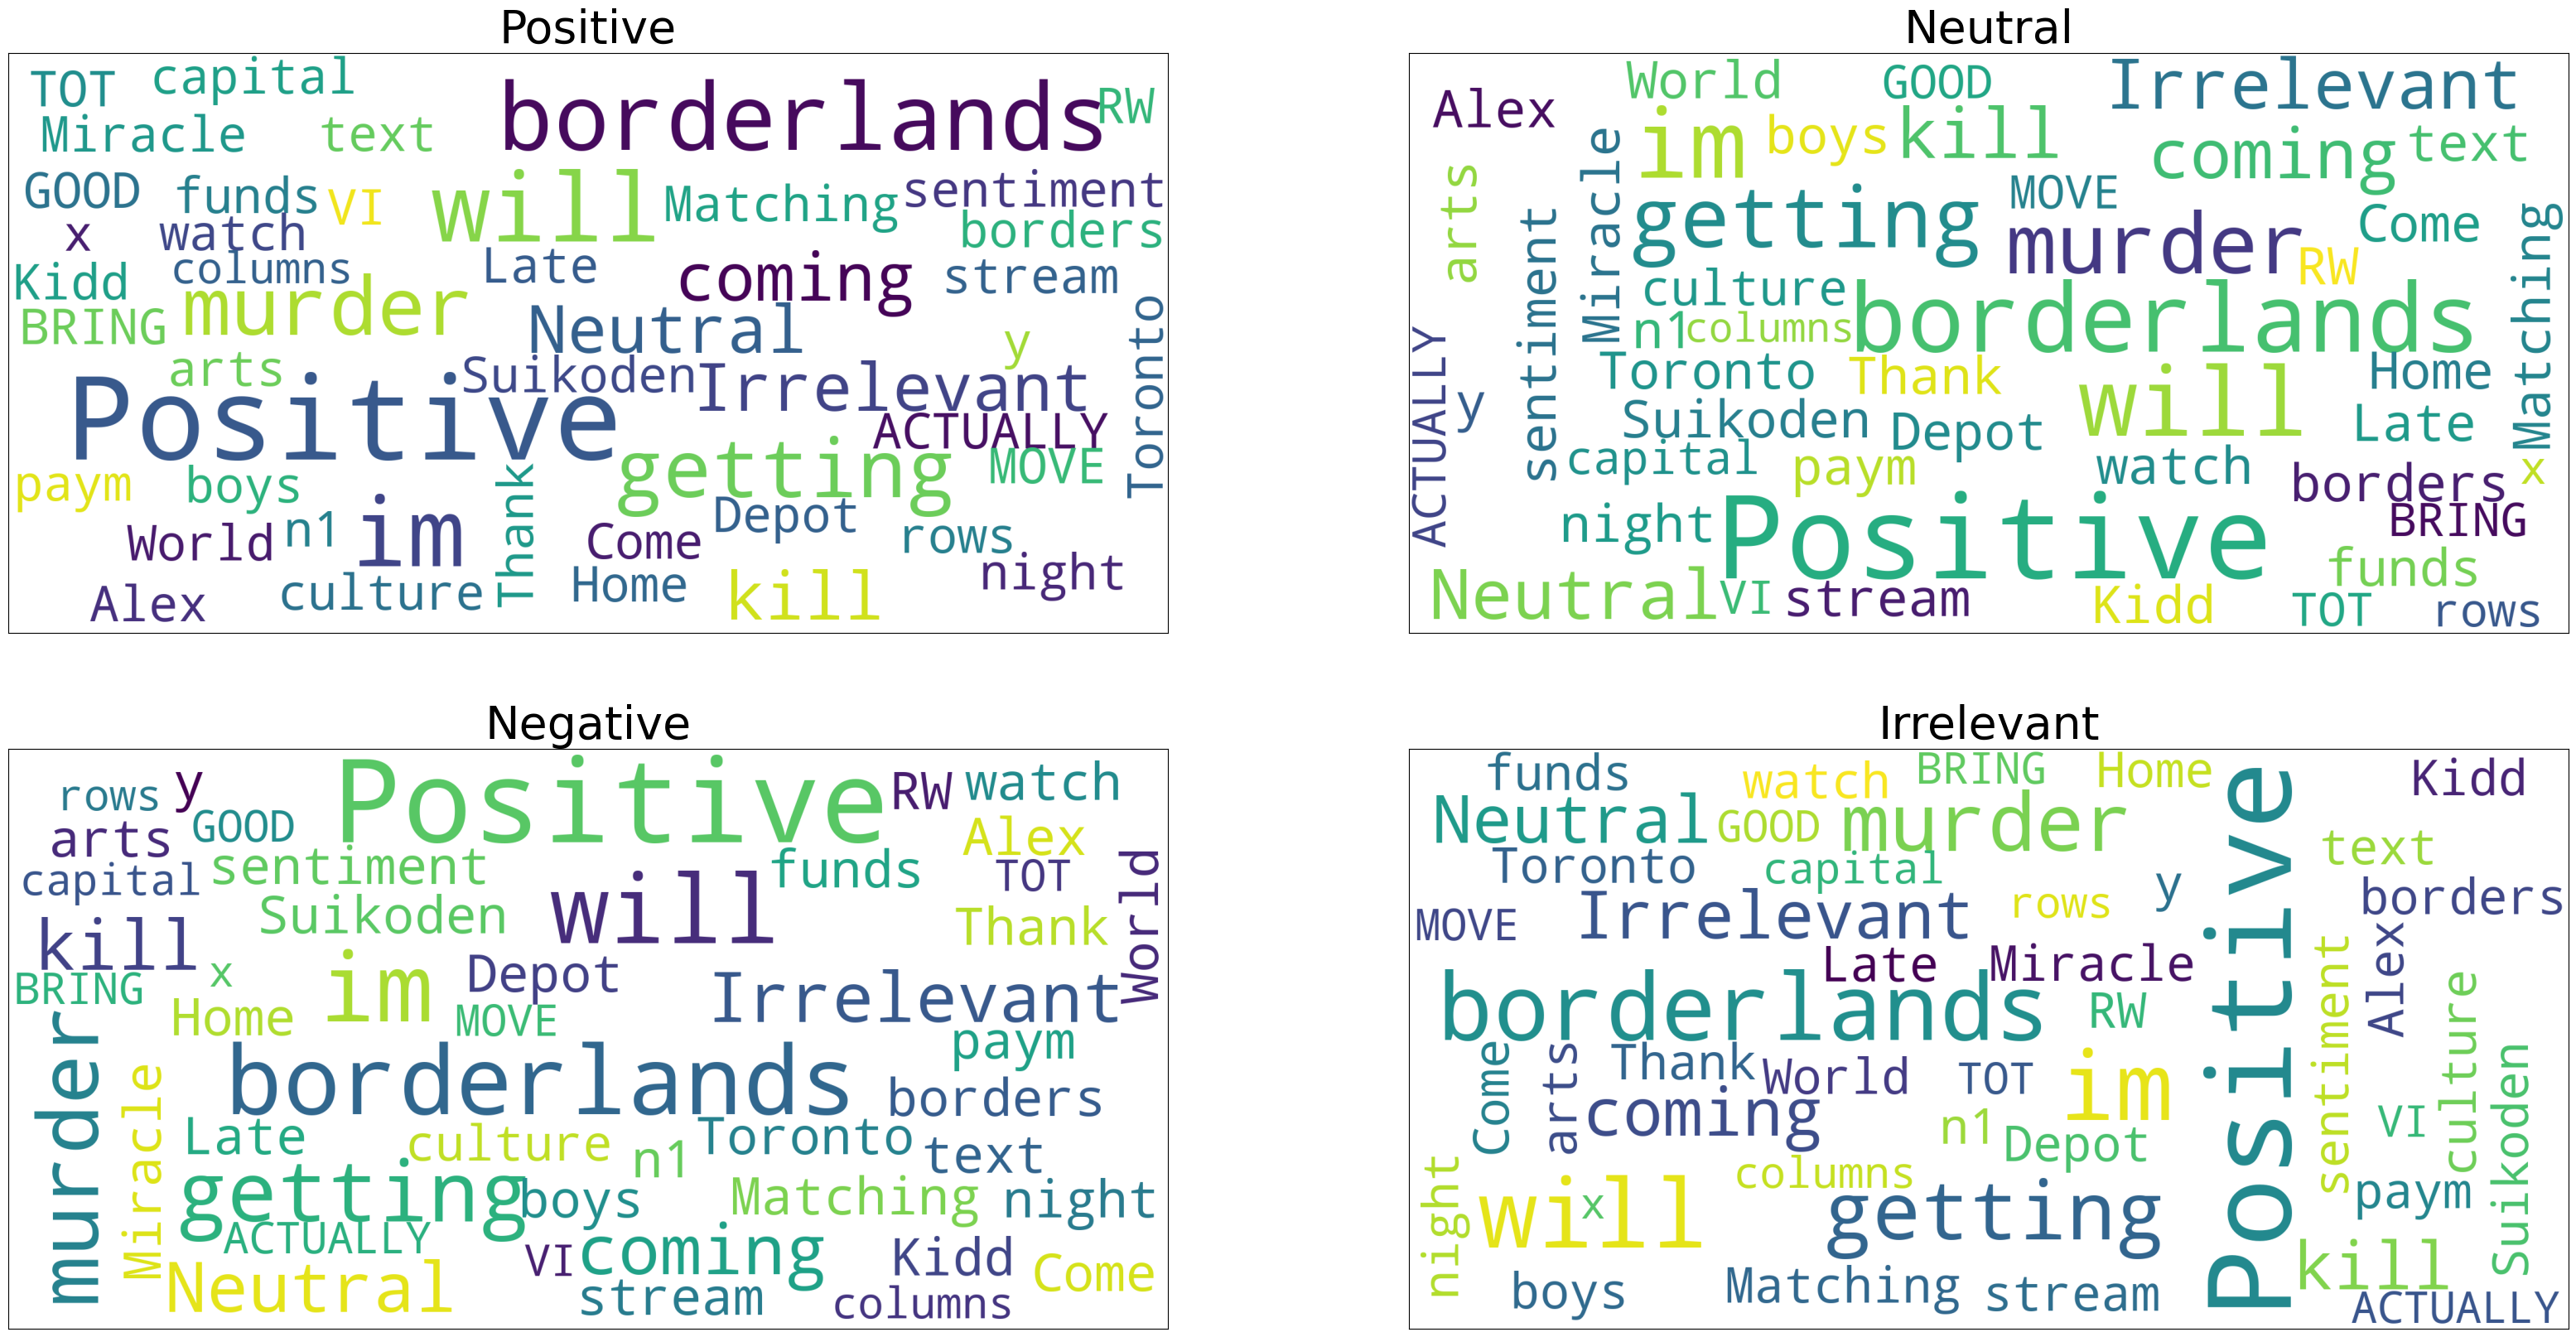

<Figure size 640x480 with 0 Axes>

In [53]:
# plot 2x2 grid word for each sentiment
plt.figure(figsize=(40,20))

for index,col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data1=data[data['sentiment']==col]
    data2=data['text']
    wordcloud=WordCloud(background_color='white',max_words=500,max_font_size=40,scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()